In [1]:
import csv

def intRow(row):
    temp = []
    for t in row:
        temp.append(int(t))
    return temp

def read_x(address):
    reader = csv.reader(open(address))
    x= [intRow(row) for row in reader]
    return x

def read_y(address):
    reader = csv.reader(open(address))
    list=[intRow(row) for row in reader]
    y=sum(list,[])
    return y

x_balance_test_0 = read_x('x_balance_test.csv')
y_balance_test = read_y('y_balance_test.csv')
x_balance_train_0 = read_x('x_balance_train.csv')
y_balance_train = read_y('y_balance_train.csv')

x_balance_2_test_0 = read_x('x_balance2_test.csv')
y_balance_2_test = read_y('y_balance2_test.csv')
x_balance_2_train_0 = read_x('x_balance2_train.csv')
y_balance_2_train = read_y('y_balance2_train.csv')

x_random_test_0 = read_x('x_random_test.csv')
y_random_test = read_y('y_random_test.csv')
x_random_train_0 = read_x('x_random_train.csv')
y_random_train = read_y('y_random_train.csv')


In [2]:
def differences(row):
    total_list = row[-4:]
    num_list = row[:-4]
    differences_list = []
    for i in range(int(len(num_list)/4)-1):
        t1=num_list[i*4:(i+1)*4]
        t2=num_list[(i+1)*4:(i+2)*4]
        differences_list += [t2[j]-t1[j] for j in range(len(t1))]
       
    return num_list + differences_list +total_list

x_balance_test = [differences(row) for row in x_balance_test_0]
x_balance_train = [differences(row) for row in x_balance_train_0]

x_balance_2_test = [differences(row) for row in x_balance_2_test_0]
x_balance_2_train = [differences(row) for row in x_balance_2_train_0]

x_random_test =  [differences(row) for row in x_random_test_0]
x_random_train =  [differences(row) for row in x_random_train_0]


In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

def print_metrics(title,y_true,y_pre):
    print(title+" dead",end = " ")
    print("recall %.2f"%recall_score(y_true, y_pre),end =" ")
    print("precision %.2f"%precision_score(y_true, y_pre),end=" ")
    print("f1_score %.2f"%f1_score(y_true, y_pre))
    
    y_flip_true = [0 if i else 1 for i in y_true]
    y_flip_pre = [0 if i else 1 for i in y_pre]
    
    print(title+" alive",end = " ")
    print("recall %.2f"%recall_score(y_flip_true, y_flip_pre),end =" ")
    print("precision %.2f"%precision_score(y_flip_true, y_flip_pre),end=" ")
    print("f1_score %.2f"%f1_score(y_flip_true, y_flip_pre))

y_pre_random_zeroR = [0 for i in range(len(y_random_test))]
y_pre_balance_zeroR = [0 for i in range(len(y_balance_test))]
y_pre_balance_2_zeroR = [0 for i in range(len(y_balance_2_test))]

print_metrics("ZeroR balance",y_balance_test,y_pre_balance_zeroR)
print_metrics("ZeroR balance_2",y_balance_2_test,y_pre_balance_2_zeroR)
print_metrics("ZeroR random",y_random_test,y_pre_random_zeroR)


ZeroR balance dead recall 0.00 precision 0.00 f1_score 0.00
ZeroR balance alive recall 1.00 precision 0.87 f1_score 0.93
ZeroR balance_2 dead recall 0.00 precision 0.00 f1_score 0.00
ZeroR balance_2 alive recall 1.00 precision 0.72 f1_score 0.84
ZeroR random dead recall 0.00 precision 0.00 f1_score 0.00
ZeroR random alive recall 1.00 precision 0.72 f1_score 0.84


D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn_random = KNeighborsClassifier()
knn_random.fit(x_random_train, y_random_train)
y_pre_random_knn = knn_random.predict(x_random_test)

knn_balance = KNeighborsClassifier()
knn_balance.fit(x_balance_train, y_balance_train)
y_pre_balance_knn = knn_balance.predict(x_balance_test)

knn_balance_2 = KNeighborsClassifier()
knn_balance_2.fit(x_balance_2_train, y_balance_2_train)
y_pre_balance_2_knn = knn_balance_2.predict(x_balance_2_test)

print_metrics("Knn balance",y_balance_test,y_pre_balance_knn)
print_metrics("Knn balance_2",y_balance_2_test,y_pre_balance_2_knn)
print_metrics("Knn random",y_random_test,y_pre_random_knn)

Knn balance dead recall 0.63 precision 0.25 f1_score 0.36
Knn balance alive recall 0.73 precision 0.93 f1_score 0.82
Knn balance_2 dead recall 0.63 precision 0.47 f1_score 0.54
Knn balance_2 alive recall 0.73 precision 0.84 f1_score 0.78
Knn random dead recall 0.37 precision 0.53 f1_score 0.44
Knn random alive recall 0.87 precision 0.78 f1_score 0.83


In [5]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB
from sklearn.preprocessing import MinMaxScaler

GaussianNB_random = GaussianNB()
GaussianNB_random.fit(x_random_train, y_random_train)
y_pre_random_GNB = GaussianNB_random.predict(x_random_test)

GaussianNB_balance = GaussianNB()
GaussianNB_balance.fit(x_balance_train, y_balance_train)
y_pre_balance_GNB = GaussianNB_balance.predict(x_balance_test)

GaussianNB_balance_2 = GaussianNB()
GaussianNB_balance_2.fit(x_balance_2_train, y_balance_2_train)
y_pre_balance_2_GNB = GaussianNB_balance_2.predict(x_balance_2_test)


print_metrics("NB balance",y_balance_test,y_pre_balance_GNB)
print_metrics("NB balance_2",y_balance_2_test,y_pre_balance_2_GNB)
print_metrics("NB random",y_random_test,y_pre_random_GNB)


NB balance dead recall 0.95 precision 0.16 f1_score 0.28
NB balance alive recall 0.28 precision 0.97 f1_score 0.43
NB balance_2 dead recall 0.95 precision 0.34 f1_score 0.50
NB balance_2 alive recall 0.29 precision 0.94 f1_score 0.44
NB random dead recall 0.96 precision 0.34 f1_score 0.50
NB random alive recall 0.28 precision 0.94 f1_score 0.43


In [6]:
from sklearn.neural_network import MLPClassifier

MLP_balance = MLPClassifier(activation='logistic',max_iter=300)
MLP_balance.fit(x_balance_train, y_balance_train)
y_pre_balance_MLP = knn_balance.predict(x_balance_test)

MLP_balance_2 = MLPClassifier(activation='logistic',max_iter=300)
MLP_balance_2.fit(x_balance_2_train, y_balance_2_train)
y_pre_balance_2_MLP = MLP_balance_2.predict(x_balance_2_test)

MLP_random = MLPClassifier(activation='logistic',max_iter=300)
MLP_random.fit(x_random_train, y_random_train)
y_pre_random_MLP = MLP_random.predict(x_random_test)

print_metrics("MLP balance",y_balance_test,y_pre_balance_MLP)
print_metrics("MLP balance_2",y_balance_2_test,y_pre_balance_2_MLP)
print_metrics("MLP random",y_random_test,y_pre_random_MLP)

D:\Anaconda\envs\NLP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP balance dead recall 0.63 precision 0.25 f1_score 0.36
MLP balance alive recall 0.73 precision 0.93 f1_score 0.82
MLP balance_2 dead recall 0.75 precision 0.45 f1_score 0.56
MLP balance_2 alive recall 0.65 precision 0.87 f1_score 0.75
MLP random dead recall 0.50 precision 0.51 f1_score 0.51
MLP random alive recall 0.81 precision 0.81 f1_score 0.81


In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_balance = RandomForestClassifier(random_state=0)
rf_balance.fit(x_balance_train, y_balance_train)
y_pre_balance_rf = rf_balance.predict(x_balance_test)

rf_balance_2 = RandomForestClassifier(random_state=0)
rf_balance_2.fit(x_balance_2_train, y_balance_2_train)
y_pre_balance_2_rf = rf_balance_2.predict(x_balance_2_test)

rf_random = RandomForestClassifier(random_state=0)
rf_random.fit(x_random_train, y_random_train)
y_pre_random_rf = rf_random.predict(x_random_test)

print_metrics("RandomForeset balance",y_balance_test,y_pre_balance_rf)
print_metrics("RandomForeset balance_2",y_balance_2_test,y_pre_balance_2_rf)
print_metrics("RandomForeset random",y_random_test,y_pre_random_rf)


RandomForeset balance dead recall 0.81 precision 0.28 f1_score 0.41
RandomForeset balance alive recall 0.68 precision 0.96 f1_score 0.80
RandomForeset balance_2 dead recall 0.80 precision 0.50 f1_score 0.61
RandomForeset balance_2 alive recall 0.69 precision 0.90 f1_score 0.78
RandomForeset random dead recall 0.37 precision 0.59 f1_score 0.45
RandomForeset random alive recall 0.90 precision 0.79 f1_score 0.84


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


input_length = len(x_balance_test[0])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


Epoch 1/20
100/100 [==============================] - 10s 34ms/step - loss: 0.5960 - accuracy: 0.6906 - recall: 0.6987 - val_loss: 0.5964 - val_accuracy: 0.6737 - val_recall: 0.7125
Epoch 2/20
100/100 [==============================] - 2s 21ms/step - loss: 0.5816 - accuracy: 0.7088 - recall: 0.7740 - val_loss: 0.5797 - val_accuracy: 0.6975 - val_recall: 0.7568
Epoch 3/20
100/100 [==============================] - 2s 21ms/step - loss: 0.5711 - accuracy: 0.7100 - recall: 0.7665 - val_loss: 0.5875 - val_accuracy: 0.7013 - val_recall: 0.7125
Epoch 4/20
100/100 [==============================] - 2s 21ms/step - loss: 0.5682 - accuracy: 0.7103 - recall: 0.8010 - val_loss: 0.5823 - val_accuracy: 0.6975 - val_recall: 0.7592
Epoch 5/20
100/100 [==============================] - 2s 21ms/step - loss: 0.5673 - accuracy: 0.7169 - recall: 0.7834 - val_loss: 0.5829 - val_accuracy: 0.7000 - val_recall: 0.7912


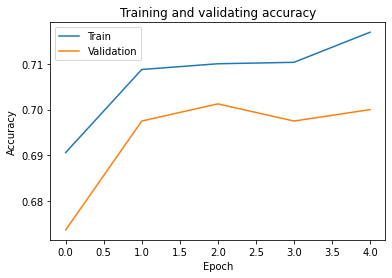

188/188 [==============================] - 2s 10ms/step
lstm balance dead recall 0.80 precision 0.24 f1_score 0.37
lstm balance alive recall 0.61 precision 0.95 f1_score 0.75


In [9]:
lstm = keras.Sequential()
lstm.add(layers.LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(input_length, 1)))
lstm.add(layers.Dropout(0.5))
lstm.add(layers.LSTM(units=50, activation='tanh', return_sequences=False))
lstm.add(layers.Dropout(0.5))
lstm.add(layers.Dense(1, activation='sigmoid'))

lstm.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy',tf.keras.metrics.Recall()])

history_lstm = lstm.fit(np.array(x_balance_train), np.array(y_balance_train),validation_split=0.2,callbacks=[callback],epochs=20)
plt.plot(history_lstm.history['accuracy'], label='Train')
plt.plot(history_lstm.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

y_pre_balance_lstm = (lstm.predict(x_balance_test) > 0.5).astype("int32").flatten()
print_metrics("lstm balance",y_balance_test,y_pre_balance_lstm.tolist())

Epoch 1/20
98/98 [==============================] - 9s 57ms/step - loss: 0.6074 - accuracy: 0.6776 - recall_1: 0.7185 - val_loss: 0.5949 - val_accuracy: 0.6965 - val_recall_1: 0.7270
Epoch 2/20
98/98 [==============================] - 5s 55ms/step - loss: 0.5879 - accuracy: 0.7035 - recall_1: 0.7715 - val_loss: 0.5847 - val_accuracy: 0.6940 - val_recall_1: 0.8015
Epoch 3/20
98/98 [==============================] - 6s 61ms/step - loss: 0.5758 - accuracy: 0.7125 - recall_1: 0.8037 - val_loss: 0.5847 - val_accuracy: 0.6914 - val_recall_1: 0.7717
Epoch 4/20
98/98 [==============================] - 6s 60ms/step - loss: 0.5678 - accuracy: 0.7185 - recall_1: 0.8050 - val_loss: 0.5814 - val_accuracy: 0.6825 - val_recall_1: 0.8015
Epoch 5/20
98/98 [==============================] - 6s 61ms/step - loss: 0.5774 - accuracy: 0.7054 - recall_1: 0.7824 - val_loss: 0.5800 - val_accuracy: 0.6889 - val_recall_1: 0.8213
Epoch 6/20
98/98 [==============================] - 6s 61ms/step - loss: 0.5727 - acc

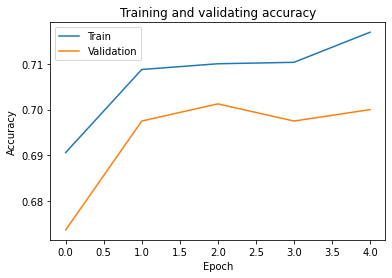

94/94 [==============================] - 3s 24ms/step
lstm balance_2 dead recall 0.77 precision 0.47 f1_score 0.58
lstm balance_2 alive recall 0.67 precision 0.88 f1_score 0.76


In [10]:
lstm3 = keras.Sequential()
lstm3.add(layers.LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(input_length, 1)))
lstm3.add(layers.Dropout(0.5))
lstm3.add(layers.LSTM(units=50, activation='tanh', return_sequences=False))
lstm3.add(layers.Dropout(0.5))
lstm3.add(layers.Dense(1, activation='sigmoid'))

lstm3.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy',tf.keras.metrics.Recall()])

history_lstm3 = lstm3.fit(np.array(x_balance_2_train), np.array(y_balance_2_train),validation_split=0.2,callbacks=[callback],epochs=20)
plt.plot(history_lstm.history['accuracy'], label='Train')
plt.plot(history_lstm.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

y_pre_balance_2_lstm = (lstm3.predict(x_balance_2_test) > 0.5).astype("int32").flatten()
print_metrics("lstm balance_2",y_balance_2_test,y_pre_balance_2_lstm.tolist())

Epoch 1/20
175/175 [==============================] - 17s 81ms/step - loss: 0.5180 - accuracy: 0.7154 - recall_2: 0.2628 - val_loss: 0.4994 - val_accuracy: 0.7336 - val_recall_2: 0.4485
Epoch 2/20
175/175 [==============================] - 14s 80ms/step - loss: 0.4979 - accuracy: 0.7334 - recall_2: 0.3455 - val_loss: 0.4912 - val_accuracy: 0.7371 - val_recall_2: 0.1804
Epoch 3/20
175/175 [==============================] - 13s 76ms/step - loss: 0.4969 - accuracy: 0.7329 - recall_2: 0.3423 - val_loss: 0.4906 - val_accuracy: 0.7421 - val_recall_2: 0.2758
Epoch 4/20
175/175 [==============================] - 14s 79ms/step - loss: 0.4934 - accuracy: 0.7380 - recall_2: 0.3391 - val_loss: 0.4875 - val_accuracy: 0.7386 - val_recall_2: 0.2577
Epoch 5/20
175/175 [==============================] - 13s 74ms/step - loss: 0.4907 - accuracy: 0.7420 - recall_2: 0.3788 - val_loss: 0.4865 - val_accuracy: 0.7500 - val_recall_2: 0.4536
Epoch 6/20
175/175 [==============================] - 6s 37ms/step - l

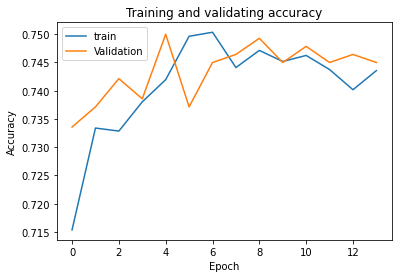

94/94 [==============================] - 7s 68ms/step
lstm random dead recall 0.31 precision 0.56 f1_score 0.40
lstm random alive recall 0.91 precision 0.78 f1_score 0.84


In [11]:
lstm2 = keras.Sequential()
lstm2.add(layers.LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(input_length, 1)))
lstm2.add(layers.Dropout(0.2))
lstm2.add(layers.LSTM(units=50, activation='tanh', return_sequences=False))
lstm2.add(layers.Dropout(0.2))
lstm2.add(layers.Dense(1, activation='sigmoid'))


lstm2.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy',tf.keras.metrics.Recall()])

history_lstm2 = lstm2.fit(np.array(x_random_train), np.array(y_random_train),validation_split=0.2,callbacks=[callback], epochs=20)
plt.plot(history_lstm2.history['accuracy'], label='train')
plt.plot(history_lstm2.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

y_pre_random_lstm = (lstm2.predict(x_random_test) > 0.5).astype("int32").flatten()
print_metrics("lstm random",y_random_test,y_pre_random_lstm.tolist())

In [12]:
balance_pre_list = [y_pre_balance_zeroR,
                    y_pre_balance_knn,
                    y_pre_balance_GNB,
                    y_pre_balance_MLP,
                    y_pre_balance_rf,
                    y_pre_balance_lstm.tolist()
                    ]

balance_2_pre_list = [y_pre_balance_2_zeroR,
                      y_pre_balance_2_knn,
                      y_pre_balance_2_GNB,
                      y_pre_balance_2_MLP,
                      y_pre_balance_2_rf,
                      y_pre_balance_2_lstm.tolist()
                      ]

random_pre_list = [y_pre_random_zeroR,
                   y_pre_random_knn,
                   y_pre_random_GNB,
                   y_pre_random_MLP,
                   y_pre_random_rf,
                   y_pre_random_lstm.tolist()
                   ]

test_list = [y_balance_test,y_balance_2_test,y_random_test]
pre_list =[balance_pre_list, balance_2_pre_list,random_pre_list]

def get_metrics(y_true,y_pre):    
    result1=[recall_score(y_true, y_pre),
             precision_score(y_true, y_pre),
             f1_score(y_true, y_pre)]
    
    y_flip_true = [0 if i else 1 for i in y_true]
    y_flip_pre = [0 if i else 1 for i in y_pre]
    
    result2=[recall_score(y_flip_true, y_flip_pre),
             precision_score(y_flip_true, y_flip_pre),
             f1_score(y_flip_true, y_flip_pre)]
    
    return result1,result2

result= []
for i in range(len(test_list)):
    test_y = test_list[i]
    pre_y_list = pre_list[i]
    result_list1=[]
    result_list2=[]
    for pre_y in pre_y_list:
        result1,result2 = get_metrics(test_y,pre_y)
        result_list1+=result1
        result_list2+=result2
    result.append(result_list1)
    result.append(result_list2)

with open('./result/diff_result.csv', 'w',newline='') as f:
    print("writing..")
    writer = csv.writer(f)
    for row in result:
        writer.writerow(row)
print("finish..")

D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


writing..
finish..
